In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

# Conversiones por día en cada mes

In [2]:
df = pd.read_csv('data/events.csv', low_memory=False)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df['timestamp'].dt.day
heatmap_df = df.loc[df['event'] == 'conversion',['timestamp', 'day', 'event']]
heatmap_df['month'] = heatmap_df['timestamp'].dt.month

In [3]:
for_heatmap = heatmap_df.pivot_table(index='day', columns='month', values='event', aggfunc='count')
for_heatmap

month,1,2,3,4,5,6
day,,,,,,
1,NaN,8.0,4.0,3.0,13.0,6.0
2,NaN,3.0,5.0,9.0,9.0,5.0
3,NaN,4.0,2.0,21.0,14.0,3.0
4,2.0,NaN,5.0,15.0,12.0,4.0
5,3.0,5.0,6.0,11.0,7.0,11.0
6,NaN,NaN,15.0,5.0,6.0,13.0
7,2.0,NaN,3.0,4.0,15.0,13.0
8,3.0,3.0,3.0,7.0,14.0,4.0
9,3.0,6.0,1.0,12.0,36.0,5.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 31 Text yticklabel objects>)

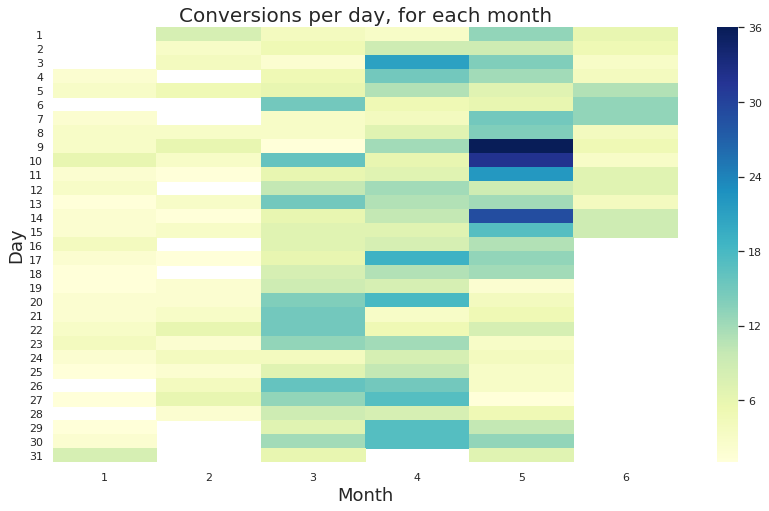

In [4]:
plt.figure(figsize=[14,8])
g = sns.heatmap(for_heatmap, cmap="YlGnBu")
g.set_title("Conversions per day, for each month", fontsize=20)
g.set_xlabel("Month", fontsize=18)
g.set_ylabel("Day", fontsize=18)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

Podemos claramente ver Junio y Julio fueron los mejores meses de ventas, pero tal vez el aumento de estas puede ser mejor visualizada con un lineplot

In [5]:
df = pd.read_csv('data/events.csv', low_memory=False)
df['timestamp'] = pd.to_datetime(df['timestamp'])
heatmap_df = df.loc[df['event'] == 'conversion',['timestamp', 'event']]
heatmap_df['month'] = heatmap_df['timestamp'].dt.month

heatmap_df.drop('timestamp', axis=1)
line = heatmap_df['month'].value_counts().to_frame()
line

line['months'] = line.index
line.sort_values(by=['months'])
line = line.rename(columns={'month': 'conversions', 'months': 'month'})

line

,conversions,month
5,351,5
4,316,4
3,265,3
6,103,6
2,74,2
1,63,1


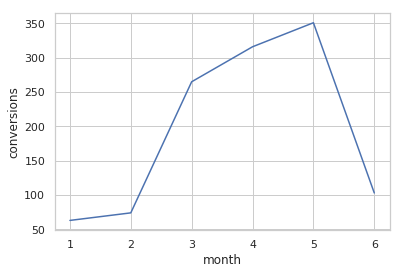

In [6]:
ax = sns.lineplot(x="month", y="conversions", data=line)


# Eventos por cada día por cada mes

In [7]:
df = pd.read_csv('data/events.csv', low_memory=False)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['s_timestamp'] = df['timestamp'].apply(lambda x: x.date())
df['weekday'] = df['timestamp'].dt.weekday_name

heatmap_df = df.loc[:,['timestamp', 'weekday', 'event']]

heatmap_df['month'] = heatmap_df['timestamp'].dt.month
heatmap_df['weekday'] = pd.Categorical(heatmap_df['weekday'],\
               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [8]:
for_heatmap = heatmap_df.pivot_table(index='weekday', columns='month', values='event', aggfunc='count')
for_heatmap

month,1,2,3,4,5,6
weekday,,,,,,
Monday,2904,4072,10176,22858,68064,41311
Tuesday,3640,4736,12653,18378,87590,43023
Wednesday,3454,4980,11185,19252,85572,39880
Thursday,2331,4289,13638,19548,82617,39445
Friday,2843,3871,11894,20171,56727,53865
Saturday,2091,3357,10227,15203,49128,34606
Sunday,2007,2581,7520,14598,45251,29752


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

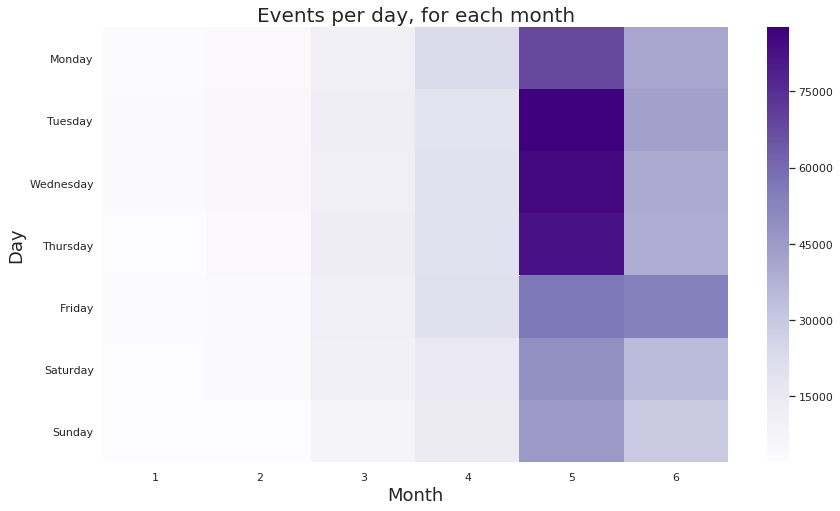

In [9]:
plt.figure(figsize=[14,8])
g = sns.heatmap(for_heatmap, cmap='Purples')
g.set_title("Events per day, for each month", fontsize=20)
g.set_xlabel("Month", fontsize=18)
g.set_ylabel("Day", fontsize=18)
plt.xticks(rotation=0)
plt.yticks(rotation=0)